<h1>PyTorch Neural Net to train Car</h1>

This notebook is the start of project 2, using the example of PyTorch tutorials from PyTorch.org. In this notebook we switch to the use of a DataLoader.

In [1]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
# We move our tensor to the GPU if available

# if torch.cuda.is_available():
#    tensor = tensor.to("cuda")

In [4]:
# import data in pandas
df_train = pd.read_csv('../simpylc/sonar_1.samples', delim_whitespace=True,
                 header=None, index_col=False)

In [5]:
# check data type -> float, not object
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2508 entries, 0 to 2507
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2508 non-null   float64
 1   1       2508 non-null   float64
 2   2       2508 non-null   float64
 3   3       2508 non-null   float64
dtypes: float64(4)
memory usage: 78.5 KB


In [6]:
# check seperator -> 4 columns present?
df_train.head()

,0,1,2,3
0,1.4079,1.2328,1.7440,-22.0
1,1.4082,1.2330,1.7441,-22.0
2,1.4062,1.2314,1.7429,-22.0
3,1.4062,1.2314,1.7429,-22.0
4,1.4011,1.2274,1.7392,-22.0


In [7]:
df_trainX = df_train.iloc[:,0:3]
df_trainX.head()

,0,1,2
0,1.4079,1.2328,1.7440
1,1.4082,1.2330,1.7441
2,1.4062,1.2314,1.7429
3,1.4062,1.2314,1.7429
4,1.4011,1.2274,1.7392


In [8]:
df_trainY = df_train.iloc[:,3]
df_trainY.head()

0   -22.0
1   -22.0
2   -22.0
3   -22.0
4   -22.0
Name: 3, dtype: float64

In [9]:
trainingSetX = torch.tensor(df_trainX.values, dtype = torch.float32)
trainingSetY = torch.tensor(df_trainY.values, dtype = torch.float32)

In [10]:
print(trainingSetX.shape)
print(trainingSetY.shape)

torch.Size([2508, 3])
torch.Size([2508])


In [11]:
# create DataLoader, then take one batch
# from batch_size=16 to 2500 (entire dataset)
loader = DataLoader(list(zip(trainingSetX,trainingSetY)), shuffle=True, batch_size=1)
for x_batch, y_batch in loader:
    # print(x_batch, y_batch)
    break

In [12]:
# create model

# model = nn.Sequential(
#     nn.Linear(3, 3),
#     nn.Tanh(),
#     nn.Linear(3, 3),
#     nn.Tanh(),
#     nn.Linear(3, 1),
#     nn.Tanh())

# model = nn.Sequential(
#     nn.Linear(3, 3),
#     nn.Linear(3, 1),
#     )

# model = nn.Linear(3,1)

In [13]:
class AutoBrain(nn.Module):
    
    def __init__(self, inputs, outputs):
        
        super().__init__()
        
        # Simple linear connections
        self.inOut = nn.Linear(inputs, outputs)
        
        # Don't use Sigmoid as this outputs y = (0,1)
        # self.sigmoid = nn.Sigmoid()
        # Use tanh as this outputs y = (-1,1)
        # self.tanh = nn.Tanh()
        # or even better: don't use activation, as this is a regression

    def forward(self, x):
        
        # return self.sigmoid(self.inOut(x))
        # return self.tanh(self.inOut(x))
        return self.inOut(x)
        # pass
        

In [14]:
# Train the model
# epochs = 200
# loss_fn = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.1)
# model.train()
# for epoch in range(epochs):
#     for x_batch, y_batch in loader:
#         y_hat = model(x_batch)
#         loss = loss_fn(y_hat, y_batch)
#         # print(y_hat-y_batch)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

In [15]:
# Train the model

model = AutoBrain(3,1)

epochCount = 0
losses = []

epochs = 100
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
model.train()
for epoch in range(epochs):
    for x_batch, y_batch in loader:
        y_hat = model(x_batch)
        loss = loss_fn(y_hat, y_batch)
        # print(y_hat-y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(loss.item())
        epochCount += 1
        losses.append(loss.item())

/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [16]:
# evaluate accuracy after training
model.eval()
y_hat = model(trainingSetX)
acc = (y_hat.round() == trainingSetY).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

Model accuracy: 2.85%


In [17]:
display(loss)

tensor(7.7827, grad_fn=<MseLossBackward0>)

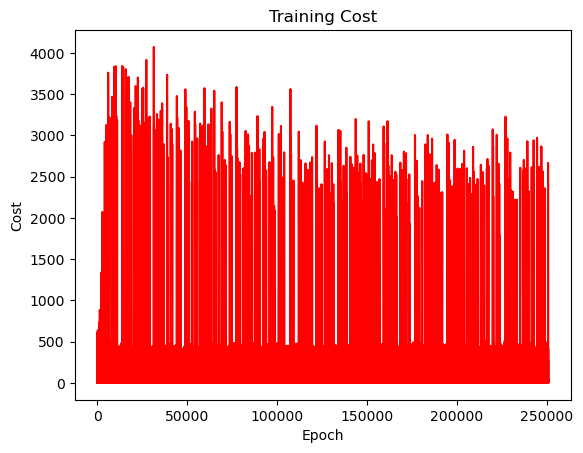

In [18]:
#----------------------------------------

fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(epochCount)], losses, 'red')
# plt.plot([x in], losses, 'red')
plt.show()

#----------------------------------------

In [113]:
# Save trained model
# data/sonar_model_weights.pth heeft accuracy 57%
torch.save(model, 'data/sonar_model_weights_2.pth')

In [117]:
import pickle

pickle.dump(model, open('data/sonar_model.pkl', 'wb'))


In [116]:
# To load trained model:
model = torch.load('data/sonar_model_weights_2.pth')
model.eval()

AutoBrain(
  (inOut): Linear(in_features=3, out_features=1, bias=True)
)

In [118]:
pickled_model = pickle.load(open('data/sonar_model.pkl', 'rb'))

In [119]:
pickled_model.eval()

AutoBrain(
  (inOut): Linear(in_features=3, out_features=1, bias=True)
)